Mount my Google Drive

* For backup
* For storage
* For file transfer

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir="/content/gdrive/My drive"
base_dir=root_dir+"fastai-v3"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Import some libraries and modules for performing some operation and matplotlib for plotting the graph

In [0]:
%matplotlib inline
from fastai.basics import *

In this lesson we will find Stochastic Gradient Descent (SGD), which is an optimization method commonly used in neural networks.

#Linear Regression Problem
Here we fit line to a set of points

Define the set of points

In [0]:
n=100

Here we will create the **Tensor** of n by 2, here n=rows and column=2.
Tensor is array of regular shape such as Rectangle, Cube etc.

In [0]:
x = torch.ones(n,2) 

Now replace every row of column 0 with number between -1 & 1

In [8]:
x[:,0].uniform_(-1.,1)

tensor([ 0.3994, -0.9016, -0.1745, -0.0190, -0.6582,  0.8308, -0.1657,  0.3525,
        -0.9496,  0.5479, -0.4796, -0.4493, -0.3048, -0.4600, -0.0848, -0.7493,
         0.2467, -0.2250,  0.7276,  0.9752, -0.6172,  0.1878,  0.5532,  0.0122,
        -0.8444,  0.1270,  0.4802,  0.4205,  0.0068, -0.5794, -0.3656, -0.3664,
        -0.4125, -0.3799, -0.8247, -0.4484, -0.4218, -0.7237,  0.5674, -0.5436,
        -0.8041, -0.8331,  0.4997, -0.9652, -0.8793, -0.2288, -0.6649, -0.3929,
        -0.5037,  0.3498, -0.7443, -0.7812,  0.8226, -0.2407,  0.7923,  0.4739,
         0.9870, -0.1576,  0.6786, -0.3457,  0.6657,  0.1853, -0.2038,  0.9854,
        -0.1219,  0.7729,  0.2500,  0.8891,  0.4771, -0.9236, -0.1888,  0.6441,
        -0.2119, -0.6411,  0.9185,  0.1139, -0.0966, -0.3311,  0.1760, -0.9363,
         0.9801,  0.5924,  0.5178,  0.4985, -0.0055,  0.2571, -0.7418,  0.8493,
         0.6880,  0.0222,  0.3135, -0.7987,  0.5890, -0.3850,  0.3773, -0.2571,
         0.4542,  0.3002, -0.6385,  0.57

Now print the 5 rows

In [9]:
x[:5]

tensor([[ 0.3994,  1.0000],
        [-0.9016,  1.0000],
        [-0.1745,  1.0000],
        [-0.0190,  1.0000],
        [-0.6582,  1.0000]])

Here we will create some coefficient such as a1 = 3 and a2 = 2

Equation :

>$y=ax+b$

>$y=a1x1+a2x2 \\ (where \ a1=a ,\ x1=x \ and\ a2=b \ and \ x2=1)$

We will create column for x and 1


In [10]:
a = tensor(3.,2); a

tensor([3., 2.])

Here  $ y = x@a$   means metrics product of x and a (vector * vector product) or (matrics * vector product) 

In [0]:
y = x@a + torch.rand(n)

Now plot the points on graph using matplotlib libraries plt object

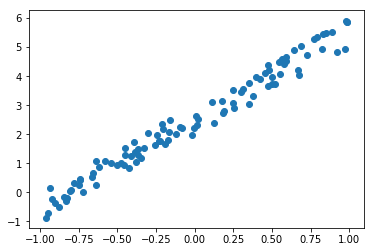

In [12]:
plt.scatter(x[:,0], y);

You want to find parameters (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the mean squared error.



For regression most common function is MSE(Mean Squared Error)

where, y_hat = prediction you made
and y = actual values on y axis

Equation :

#$\sum_ \frac{(y_hat - y)^2}{n}$

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we guess a = (-1.0,1.0), then we can find y_hat which is prediction and compute the error

In [0]:
a = tensor(-1.,1)

Compute the error using MSE function

In [15]:
y_hat = x@a
mse(y_hat, y)

tensor(7.7321)

Now the error is tensor(7.7321) so plot the graph for y and y_hat

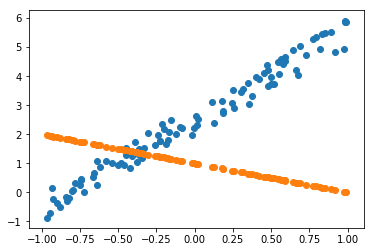

In [16]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

Now we have specified linear regression and the loss function , Now we have to handle optimization i.e. what is the best fit value of  '**a**'  and how to find best fitting linear regression

Now take the guess of orange line and make it even better

So the question is how can we make it better ?

There are 2 number availabe i.e.
1.   Interception of orange line
2.   Gradient of orange line

So there  are 4 possibilities to make orange line better

1.   What if we made intercept higher
2.   What if we made intercept lower
3.  What if we made gradient positive
4.  What if we made gradient negative



#Gradient Descent

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

In [17]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

Now find, 
* y_hat i.e. prediction using x@a and
* loss of y_hat and y
* Calculate gradient using loss.backward() method
* Take coefficient a and subtract and replace from (lr * a.grad()) where lr=learning rate and a.grad()= gradient

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

Repeat the above process for 100 times because n = 100

In [19]:
lr = 1e-1
for t in range(100): update()

tensor(7.7321, grad_fn=<MeanBackward0>)
tensor(1.5580, grad_fn=<MeanBackward0>)
tensor(0.4552, grad_fn=<MeanBackward0>)
tensor(0.1779, grad_fn=<MeanBackward0>)
tensor(0.1069, grad_fn=<MeanBackward0>)
tensor(0.0886, grad_fn=<MeanBackward0>)
tensor(0.0840, grad_fn=<MeanBackward0>)
tensor(0.0828, grad_fn=<MeanBackward0>)
tensor(0.0825, grad_fn=<MeanBackward0>)
tensor(0.0824, grad_fn=<MeanBackward0>)


Now plot the graph for y and x@a

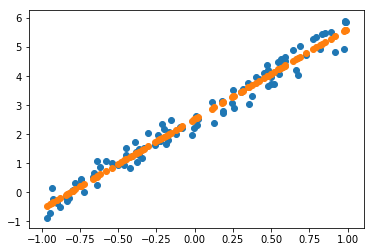

In [20]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

That's it! we got Gradient Descent

#Animate it!


In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [22]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)